# Patient Demographics
Charts showing the makeup of the population using Thousand Smiles Clinics historical data.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from datetime import datetime
from dateutil.relativedelta import relativedelta
import random

#default colors
colors_ = ('viridis(np.linspace(0, 1, 12))', plt.cm.viridis(np.linspace(0, 1, 7)))[1]
import sys
sys.path.append('..')
import TSD




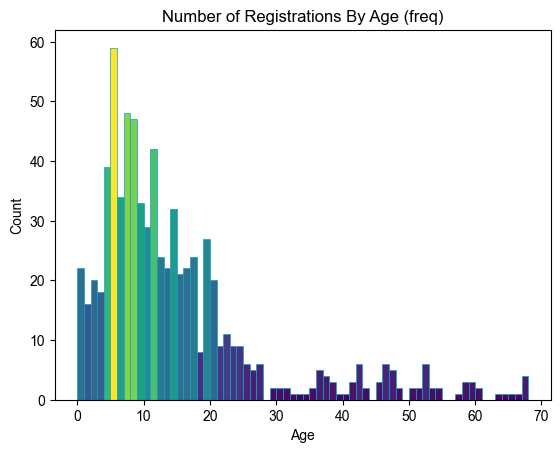

In [2]:
def compute_age(row):
    d1 = datetime.strptime(row["start"], "%Y-%m-%d")
    d2 = datetime.strptime(row["dob"], "%Y-%m-%d")
    diff_in_years = relativedelta(d1, d2)
    return diff_in_years.years

merged_df = TSD.df_merged

merged_df["age_in_years"] = merged_df.apply(lambda row: compute_age(row), axis=1)

age_row = merged_df["age_in_years"]
fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)
plt.style.use('seaborn-v0_8-whitegrid') # nice and clean grid
n, bins, patches = axes1.hist(data = merged_df, x='age_in_years', facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5, bins = int(merged_df["age_in_years"].max()))

axes1.set_title("Number of Registrations By Age (freq)", fontsize=12)
axes1.set_xlabel("Age", fontsize = 10)
axes1.set_ylabel("Count", fontsize = 10)

n = n.astype('int')
for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.viridis(n[i]/max(n)))
plt.show()



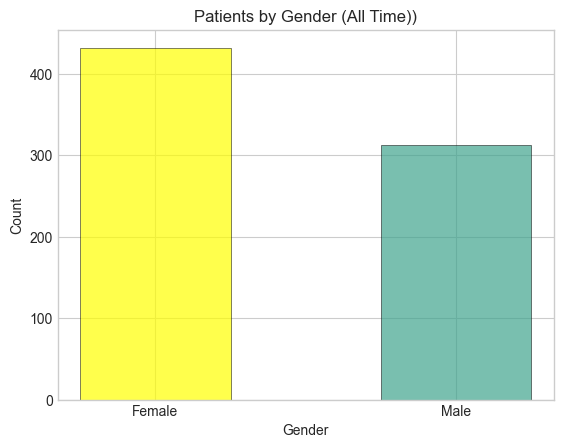

In [3]:
di = {'m': "Male", 'f': "Female"}
merged_df = merged_df.replace({"gender": di})


gender_row = merged_df["gender"]
fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)
plt.style.use('seaborn-v0_8-whitegrid') # nice and clean grid
n, bins, patches = axes1.hist(data = merged_df, x='gender', facecolor = '#2ab0ff'
                              , edgecolor='black', linewidth=0.5, bins = 2, align = 'mid', 
                                rwidth= 0.5)

axes1.set_title("Patients by Gender (All Time))", fontsize=12)
axes1.set_xlabel("Gender", fontsize = 10)
axes1.set_ylabel("Count", fontsize = 10)
patches[1].set_facecolor('#40a48e')
patches[0].set_facecolor('yellow')

patches[0].set_alpha(0.7)
patches[1].set_alpha(0.7)

ticks = [0.25,0.75]
ticklabels = ['Female','Male']
plt.xticks(ticks, ticklabels)

plt.show()